In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('data1.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
 RAD       506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
 LSTAT     506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
import matplotlib.pyplot as plt

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotli

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9918FC508>,
      dtype=object)

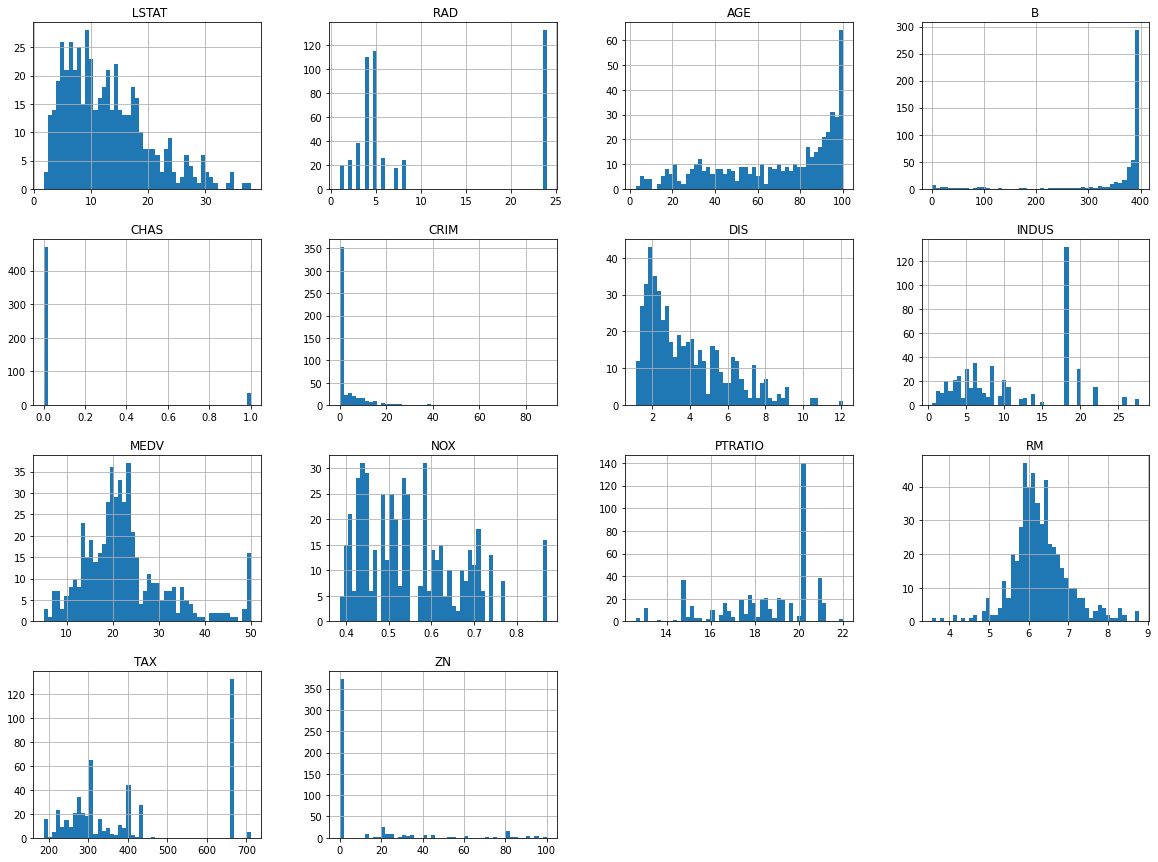

In [8]:
housing.hist(bins =50 ,figsize=(20,15))

In [9]:
import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size =int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
    

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# len(train_set)

In [12]:
# len(test_set)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42 )
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set =housing.loc[train_index]
    strat_test_set = housing.loc[test_index]






# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [15]:
print(len(strat_train_set),len(strat_test_set))

404 102


In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [18]:
404/28

14.428571428571429

In [19]:
102/7

14.571428571428571

In [20]:
corr_matrix =housing.corr()

In [21]:
 corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
 RAD      -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
 LSTAT    -0.737663
Name: MEDV, dtype: float64

In [22]:
from pandas.plotting import scatter_matrix

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\plotting\_matplotli

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D99568B988>,
      dtype=object)

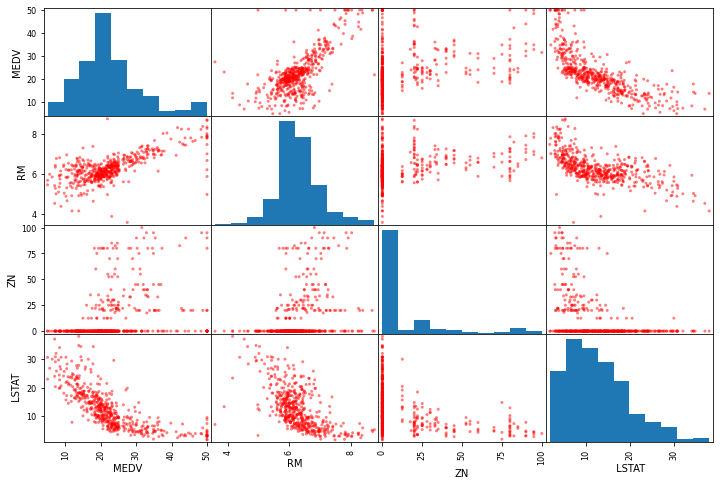

In [23]:
attributes = ["MEDV","RM","ZN"," LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8),color='r')

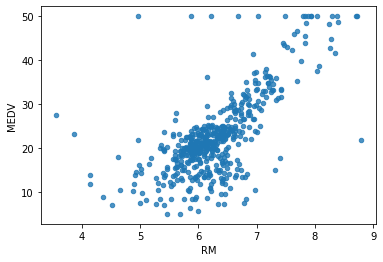

In [24]:
housing.plot(kind='scatter',x="RM",y="MEDV",alpha=.8)

In [25]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy() 

## Scikit learn Design

### Creating a pipeline

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [28]:
housing_num_tr = my_pipline.fit_transform(housing)

In [29]:
housing_num_tr.shape

(404, 13)

## Model design

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

In [32]:
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
# check some data

In [34]:
some_data = housing.iloc[:5]

In [35]:
some_labels = housing_labels.iloc[:5]

In [36]:
prepared_data = my_pipline.transform(some_data)

In [37]:
model.predict(prepared_data)

array([22.46 , 25.688, 16.69 , 23.352, 23.591])

In [38]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [39]:
# high amount of error

## Evaluting the model

In [40]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels,housing_prediction)
lin_rmse =np.sqrt(lin_mse)

In [41]:
lin_mse

1.406596801980196

In [42]:
lin_rmse

1.1860003381029012

In [43]:
#  zero error mean over fit data


### better evalution cross validation

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [45]:
rmse_scores

array([2.73983561, 2.79038749, 4.25587696, 2.67003391, 3.50314787,
       2.70897332, 4.83257812, 3.34678693, 3.3919127 , 3.20884787])

In [46]:
def print_scores(scores):
    print("scores:", scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

In [47]:
print_scores(rmse_scores)

scores: [2.73983561 2.79038749 4.25587696 2.67003391 3.50314787 2.70897332
 4.83257812 3.34678693 3.3919127  3.20884787]
Mean: 3.34483807757979
Standard deviation: 0.67987245428948


In [48]:
#result

1.  model = LinearRegression()
    Mean: 5.030437102767306
    Standard deviation: 1.060766115829484


2.  model = DecisionTreeRegressor()
    Mean: 4.1937188771946206
    Standard deviation: 0.8587565619662136
    
    
3.  model = RandomForestRegressor()
    Mean: 3.325837714880451
    Standard deviation: 0.7533422661781848


In [49]:
# choose random forest regration

## saving model

In [50]:
from joblib import dump, load

In [51]:
dump(model,'house_price.joblib')

['house_price.joblib']

## Test model

In [52]:
x_test = strat_test_set.drop("MEDV",axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipline.transform(x_test)
final_prediction = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [53]:
print(final_prediction,list(y_test))

[25.066 11.504 25.536 22.383 18.614 14.755 20.287 14.573 31.565 42.339
 19.978 11.722 25.12  25.86  19.427 10.626 31.311 14.532 23.709 19.199
 19.89  17.689 17.529 22.009 18.66  30.828 15.776 32.746  8.769 33.169
 23.742 21.104 22.885 11.314 21.495 11.116 43.277 24.41  23.403 42.433
 24.299 29.609 20.281 20.904 19.03  33.316 44.268 20.128 20.41  21.046
 20.988 14.273 21.373 15.217 25.423 32.975 42.304 29.041 19.519 20.827
 47.015  9.983 19.29  25.025 14.705 33.49  19.407 18.379 19.663 33.819
 25.867 22.695 21.332 22.54  34.468 12.8   15.708 20.179 20.716 21.225
 22.569 20.753 13.631 22.817 20.816 21.338 13.842 21.13  21.786 23.072
 18.585 27.273  7.418 26.145 19.118 29.966 20.082 31.357 14.546 26.597
 21.559 20.834] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [54]:
final_rmse

2.9319572145314683

## using of model 

In [55]:
# this is used in another file

In [56]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

### house price pridection model use

In [57]:
import numpy as np
from joblib import dump, load

In [58]:
model = load('house_price.joblib')

In [59]:
input =np.array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [60]:
model.predict([input])

array([22.46])

In [61]:
# real value 24